# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

## Get Required Files from Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#Set your project path 
project_path =  '/content/drive/My Drive/Colab Notebooks/AIML/NLP/Week 6 - NLP Project/'
import pandas as pd
import numpy as np

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [3]:
df=pd.read_json(project_path+'Sarcasm_Headlines_Dataset.json', lines=True)
df.columns

Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')

In [4]:
df.head(10)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


In [5]:
print(df.shape)
print(df.is_sarcastic.value_counts())

(26709, 3)
0    14985
1    11724
Name: is_sarcastic, dtype: int64


#Generating a Word Frequency

In [6]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(df.headline.str)

to              8206
of              5593
the             5177
in              4170
for             3297
                ... 
cities:            1
skimp              1
'civic             1
delete,            1
bare-knuckle       1
Length: 36599, dtype: int64

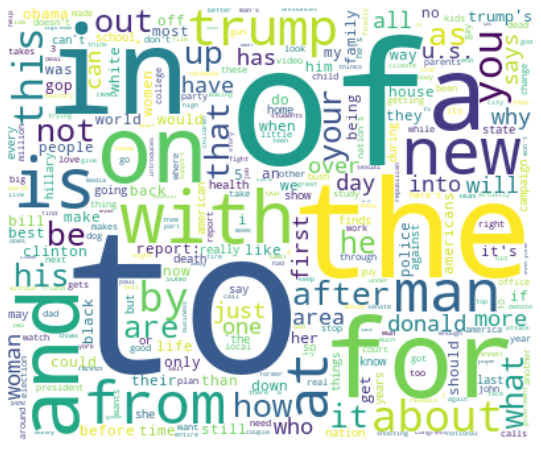

In [7]:
#Generate a word cloud

#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=500, 
               background_color='white').generate_from_frequencies(gen_freq(df.headline.str))

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#We could get a more meaningful word cloud with cleaned text i.e.
1. Remove stop words, punctuations etc
2. Remove digits, symbols etc. if any
3. Lammetize the sentences to reduce the number of words in use

In [8]:
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

stop_words = set(stopwords.words('english')) 

def text_cleaner(text):
    #converting to lowercase
    newString = text.lower()
    #removing links
    newString = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', newString) 
    #removing text inside ()
    newString = re.sub(r'\([^)]*\)', '', newString)
    #removing text inside []
    newString = re.sub(r'\{[^)]*\}', '', newString)
    #fetching alphabetic characters
    newString = re.sub("[^a-zA-Z]", " ", newString)
    #removing stop words
    tokens = [w for w in newString.split() if not w in stop_words] 
    long_words=[]
    for i in tokens:
        #removing short words
        if len(i)>1:                                                 
            long_words.append(i)   
    return (" ".join(long_words)).strip()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
cleaned_text=[]
for i in df.headline:
    cleaned_text.append(text_cleaner(i)) 

In [0]:
df['cleaned_text']=cleaned_text

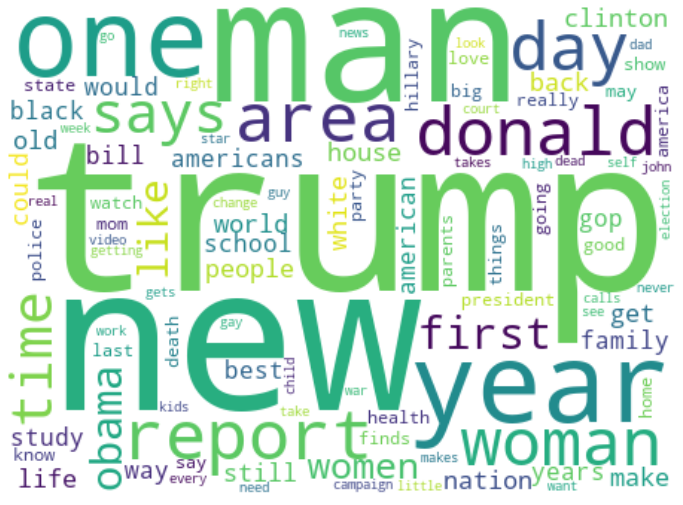

In [11]:
text = df.headline.apply(lambda x: text_cleaner(x))
word_freq = gen_freq(text.str)

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

WE see a lot of references to American presidents like Obama, Trump, clinton, women, american family etc..

This suggests that the headlines could be around election of American president when Hillary Clinton, Trump and Obama were contributors to headlines. There is refernce to american family, white, americans best which were some of the election slogans at that time

In [12]:
print('10 random headlines which are sarcastic: \n')
cl = df.loc[df.is_sarcastic == 1, ['headline']].sample(10).values
for c in cl:
    print(c[0])

10 random headlines which are sarcastic: 

man burning in hell wishes he hadn't snickered at religious leaflet
mike pence disappointed in the 200,000 husbands and fathers who permitted women to attend march
empty beer bottle released into wild
tooth fairy helps self to more teeth
kasparov de-rezzed
lonesome alito declares marriage only between a man and the sea
radicals, extremists vie for control of iran
area mofo announces plans to chill
biden urges paul ryan to check out nude scene from 'porky's' on phone
wound-up tim kaine running around clinton campaign headquarters in pajamas


In [13]:
print('10 random headlines which are not sarcastic: \n')
cl = df.loc[df.is_sarcastic == 0, ['headline']].sample(10).values
for c in cl:
    print(c[0])

10 random headlines which are not sarcastic: 

nestle to switch to cage-free eggs in u.s. by 2020
how laramie's lgbt decision awakens us
tom cruise holds his breath for 6 minutes for 'mission: impossible - rogue nation' stunt
fourth graders suspended after plotting to kill teacher with hand sanitizer
food hacks for the best tailgate ever
this republican once said helping refugees made us a 'better nation.' but now he's done.
40 symptoms of a healthy woman
how do you sleep at night while cutting meals on wheels? a white house guide
gene simmons' message to wannabe rocker: 'get a damn job'
ferocious rat refuses to let hungry snake steal rat pup


trump 1684
new 1519
man 1394
year 552
report 515
area 491
woman 480
donald 474
day 470
says 453
time 439
obama 420
like 405
women 402
people 398
old 393
world 383
life 379
nation 362
house 356


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Top 20 words in headlines after removing stop words')

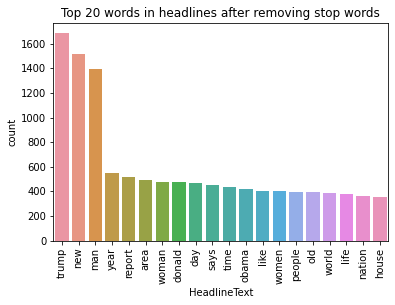

In [14]:
#The distribution of top unigrams after removing stop words
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['cleaned_text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['HeadlineText' , 'count'])

x=pd.DataFrame(df2.groupby('HeadlineText').sum()['count'].sort_values(ascending=False))
import seaborn as sns
sns.barplot(x=x.index, y=x['count'])
plt.xticks(rotation=90)
plt.title('Top 20 words in headlines after removing stop words')

new study finds 33
huffpost rise need 22
rise need know 22
new york times 21
friday morning email 15
new york city 15
funniest tweets women 15
tweets women week 15
donald trump says 13
martin luther king 12
donald trump jr 12
saturday night live 11
lin manuel miranda 11
friday talking points 11
thursday morning email 11
black lives matter 10
american horror story 10
wednesday morning email 10
year old boy 10
luther king jr 10


Text(0.5, 1.0, 'Top 20 trigrams in headlines after removing stop words')

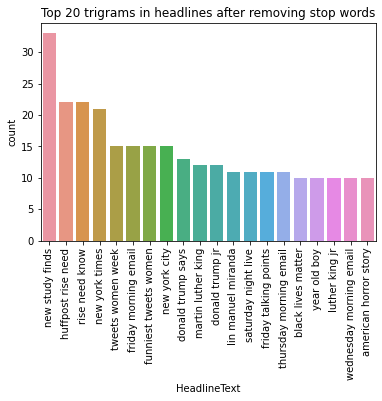

In [15]:
# The distribution of Top trigrams after removing stop words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['cleaned_text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['HeadlineText' , 'count'])
x=pd.DataFrame(df6.groupby('HeadlineText').sum()['count'].sort_values(ascending=False))
import seaborn as sns
sns.barplot(x=x.index, y=x['count'])
plt.xticks(rotation=90)
plt.title('Top 20 trigrams in headlines after removing stop words')

In [0]:
pip install scattertext

     |████████████████████████████████| 6.8MB 4.2MB/s 


In [0]:
import spacy
import scattertext  as st
nlp = spacy.load("en_core_web_sm")

In [0]:
df['cleaned_text']=cleaned_text

In [0]:
corpus = st.CorpusFromPandas(df, category_col='is_sarcastic', text_col='cleaned_text', nlp=nlp).build()
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))

['obama', 'trump', 'obamacare', 'twitter', 'tweets', 'huffpost', 'facebook', 'kardashian', 'comey', 'lgbtq']


Following are the terms in review text that are most associated with the Top texts that are not considered to be sarcasms

In [0]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Tops Score'] = corpus.get_scaled_f_scores(0)
print(list(term_freq_df.sort_values(by='Tops Score', ascending=False).index[:10]))

['huffpost', 'morning email', 'queer', 'lgbt', 'kardashian', 'trans', 'jenner', 'need know', 'lgbtq', 'roundup']


In [0]:
#Following are the terms in review text that are most associated with the Top texts that are considered to be sarcasms
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Tops Score'] = corpus.get_scaled_f_scores(1)
print(list(term_freq_df.sort_values(by='Tops Score', ascending=False).index[:10]))

['clearly', 'fucking', 'fuck', 'shit', 'area woman', 'unable', 'realizes', 'archives', 'historical archives', 'recommends']


## Drop `article_link` from dataset
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [0]:
df=df.drop('article_link', axis=1)

## Get the Length of each line and find the maximum length.
As different lines are of different length. We need to pad the our sequences using the max length.

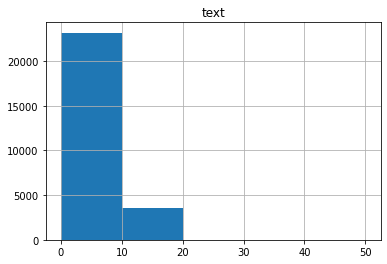

In [0]:
import matplotlib.pyplot as plt

text_word_count = []

#populate the lists with sentence lengths
for i in df['cleaned_text']:
      text_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count})

length_df.hist(bins = 5, range=(0,50))
plt.show()

Most of the words seem to have a sequence length less than or equal to 10. We may want to pad the headlines to 10

#**## Modelling**

## Import required modules required for modelling.

In [0]:
pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [18]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, TimeDistributed, Reshape,Dot
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *
from keras.initializers import Constant

Using TensorFlow backend.


# Set Different Parameters for the model.

In [0]:
max_features = 10000
maxlen = 10
embedding_size = 200

Split the dataset into train and test to ensure there is training on a part of the test and evaluation of the model on unseen data

In [0]:

train = df.sample(frac=0.75, random_state=99)
test = df.loc[~df.index.isin(train.index), :]

In [0]:
cleaned_text_train=[]
for i in train['headline']:
    cleaned_text_train.append(text_cleaner(i)) 

train['cleaned_text']=cleaned_text_train

In [140]:
cleaned_text_test=[]
for i in test['headline']:
    cleaned_text_test.append(text_cleaner(i)) 

test['cleaned_text']=cleaned_text_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [23]:
train.shape

(20032, 3)

## Apply Keras Tokenizer of headline column of your data. 

Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train['cleaned_text'])




# Define X and y for your model.

In [142]:
X = tokenizer.texts_to_sequences(train['cleaned_text'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(train['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 20032
[   0    0    0    0    0  275 8355  284 2928 5394]
Number of Labels:  20032
1


## Get the Vocabulary size
Hint : You can use tokenizer.word_index.

In [143]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 21734 unique tokens.


#**## Word Embedding**

## Get Glove Word Embeddings

In [0]:
glove_file = project_path + "glove.6B.zip"

In [0]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [145]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

print('Found %s word vectors.' % len(embeddings))

Found 400000 word vectors.


# Create a weight matrix for words in training docs

In [0]:
embedding_dim = 200

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((len(word_index)+1, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

## Create and Compile your Model


Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [31]:
model = Sequential()
model.add(Embedding(len(word_index)+1,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=maxlen,
                    trainable=True))

model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(32, recurrent_dropout=0.1,return_sequences=True)))
model.add(Bidirectional(LSTM(16, recurrent_dropout=0.1)))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 200)           4347000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 10, 200)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 64)            59648     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                10368     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy


In [32]:
epochs = 10
batch_size = 128

history = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)

Epoch 1/10
126/126 [==============================] - 29s 230ms/step - loss: 0.5849 - accuracy: 0.6825 - val_loss: 0.4861 - val_accuracy: 0.7684
Epoch 2/10
126/126 [==============================] - 28s 225ms/step - loss: 0.4300 - accuracy: 0.8054 - val_loss: 0.4291 - val_accuracy: 0.8023
Epoch 3/10
126/126 [==============================] - 28s 224ms/step - loss: 0.3316 - accuracy: 0.8578 - val_loss: 0.4201 - val_accuracy: 0.8058
Epoch 4/10
126/126 [==============================] - 28s 221ms/step - loss: 0.2622 - accuracy: 0.8959 - val_loss: 0.4499 - val_accuracy: 0.8048
Epoch 5/10
126/126 [==============================] - 28s 220ms/step - loss: 0.2143 - accuracy: 0.9122 - val_loss: 0.4681 - val_accuracy: 0.8128
Epoch 6/10
126/126 [==============================] - 28s 219ms/step - loss: 0.1695 - accuracy: 0.9347 - val_loss: 0.5223 - val_accuracy: 0.8096
Epoch 7/10
126/126 [==============================] - 28s 223ms/step - loss: 0.1427 - accuracy: 0.9456 - val_loss: 0.5690 - val_ac

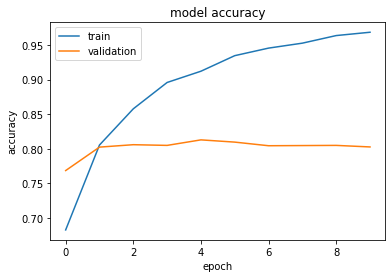

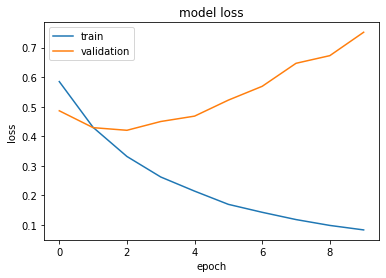

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [34]:
# evaluate the model
loss, accuracy = model.evaluate(X, y, verbose=2)
print('Training_Accuracy: %f' % (accuracy*100))

626/626 - 9s - loss: 0.1775 - accuracy: 0.9523
Training_Accuracy: 95.232630


Test the model on unseen data i.e. test data. While training we already had checked the validation accuracy to be at 80%. This validation accuracy is a fair indicator, however the model still had access to the validation data, as the validation data was a split out from training data.

We had separated test data earlier which can be an independent evaluator

In [0]:
X_test = tokenizer.texts_to_sequences(test['cleaned_text'])
X_test = pad_sequences(X_test, maxlen = maxlen)
y_test = np.asarray(test['is_sarcastic'])

In [0]:
word_index_test = tokenizer.word_index

In [0]:
y_hat = model.predict(X_test)
y_pred=np.round(y_hat)

In [38]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(classification_report(y_pred,y_test))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.80      0.84      4233
         1.0       0.70      0.81      0.75      2444

    accuracy                           0.80      6677
   macro avg       0.79      0.81      0.79      6677
weighted avg       0.81      0.80      0.81      6677

0.8035045679197245


In [39]:
confusion_matrix(y_test,y_pred)

array([[3377,  456],
       [ 856, 1988]])

In [0]:
from more_itertools import one

y=[]
for i in range(0,len(y_pred)):
  y.append(one(y_pred[i]))

In [93]:
#reset indices of test data
test.reset_index(inplace=True)

Int64Index([    4,     8,    11,    13,    17,    18,    33,    36,    43,
               44,
            ...
            26675, 26677, 26678, 26680, 26685, 26686, 26689, 26695, 26704,
            26705],
           dtype='int64', length=6677)
RangeIndex(start=0, stop=6677, step=1)


In [107]:
print('1st Label of test set: ', y_test[0])
print('1st Text in test set: ', test['cleaned_text'][0])
print('Prediction for the above is: ', y[0])

1st Label of test set:  0
1st Text in test set:  rowling wishes snape happy birthday magical way
Prediction for the above is:  0.0


In [108]:
test.columns

Index(['index', 'headline', 'is_sarcastic', 'cleaned_text'], dtype='object')

In [111]:
print('2000th Label of test set: ', y_test[2000])
print('2000th Text in test set: ', test['headline'][2000])
print('Prediction for the above is: ', y[2000])

2000th Label of test set:  0
2000th Text in test set:  are you missing something vital from your growth hacking strategy?
Prediction for the above is:  0.0


In [112]:
print('6500th Label of test set: ', y_test[6500])
print('6500th Text in test set: ', test['headline'][6500])
print('Prediction for the above is: ', y[6500])

6500th Label of test set:  1
6500th Text in test set:  beyoncé quickly releases new song about how buying tidal subscription most empowering thing a woman can do
Prediction for the above is:  0.0


In [113]:
print('6500th Label of test set: ', y_test[2510])
print('6500th Text in test set: ', test['headline'][700])
print('Prediction for the above is: ', y[700])

6500th Label of test set:  0
6500th Text in test set:  healthy and frosted (!) paleo carrot cake cookies
Prediction for the above is:  0.0


In [0]:
SarcasticPreds_Index=[index for index,value in enumerate(y) if value == 1]
NonSarcasticPreds_Index=[index for index,value in enumerate(y) if value == 0]

In [119]:
SarcasticPreds_Index[0:5], SarcasticPreds_Index[100:105]

([7, 12, 17, 21, 22], [273, 275, 278, 281, 282])

In [117]:
print('7th Label of test set: ', y_test[7])
print('7th Text in test set: ', test['headline'][7])
print('Prediction for the above is: ', y[7])

7th Label of test set:  1
7th Text in test set:  giant altoid heading toward earth
Prediction for the above is:  1.0


In [118]:
print('12th Label of test set: ', y_test[12])
print('12th Text in test set: ', test['headline'][12])
print('Prediction for the above is: ', y[12])

12th Label of test set:  1
12th Text in test set:  bats shooed out of nation's waterslide tunnels in preparation for summer
Prediction for the above is:  1.0


In [122]:
print('281st Label of test set: ', y_test[281])
print('Text for above in test set: ', test['headline'][281])
print('Prediction for the above is: ', y[281])

281st Label of test set:  1
Text for above in test set:  demoted cop unsure why desk job considered punishment
Prediction for the above is:  1.0


# Try Attention Model

In [0]:
#Create Attention Layer
from keras import initializers
from keras import backend as K

seq_input = Input(shape=(maxlen,), dtype='int32')

In [0]:
embedded = Embedding(max_features,
                     embedding_dim,
                     input_length=maxlen)(seq_input)

In [0]:
embedded = Dropout(0.2)(embedded)

In [0]:
lstm = Bidirectional(LSTM(embedding_dim, return_sequences=True))(embedded)

In [0]:
lstm = Dropout(0.2)(lstm)

# Attention Mechanism

In [0]:
att_vector = TimeDistributed(Dense(1))(lstm)

In [0]:
att_vector = Reshape((maxlen,))(att_vector)

In [0]:
att_vector = Activation('sigmoid', name='attention_vec')(att_vector)

In [0]:
att_output = Dot(axes=1)([lstm, att_vector])

Final Layers

In [0]:
fc = Dense(embedding_dim, activation='relu')(att_output)

In [0]:
output = Dense(1, activation='sigmoid')(fc)

In [0]:
model = Model(inputs=[seq_input], outputs=output)

In [135]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 10, 200)      2000000     input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 10, 200)      0           embedding_1[0][0]                
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 10, 400)      641600      dropout_1[0][0]                  
______________________________________________________________________________________________

In [0]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer='adam')

In [147]:
%%time
history = model.fit(X, y, epochs=10, batch_size=128, validation_split=0.2, shuffle=True, verbose=2)

Epoch 1/10
126/126 - 4s - loss: 0.5290 - accuracy: 0.7269 - val_loss: 0.4307 - val_accuracy: 0.8063
Epoch 2/10
126/126 - 3s - loss: 0.2952 - accuracy: 0.8756 - val_loss: 0.4726 - val_accuracy: 0.7921
Epoch 3/10
126/126 - 3s - loss: 0.1884 - accuracy: 0.9261 - val_loss: 0.6301 - val_accuracy: 0.7756
Epoch 4/10
126/126 - 3s - loss: 0.1171 - accuracy: 0.9548 - val_loss: 0.6860 - val_accuracy: 0.7816
Epoch 5/10
126/126 - 3s - loss: 0.0773 - accuracy: 0.9707 - val_loss: 0.9266 - val_accuracy: 0.7682
Epoch 6/10
126/126 - 3s - loss: 0.0501 - accuracy: 0.9813 - val_loss: 1.1112 - val_accuracy: 0.7687
Epoch 7/10
126/126 - 3s - loss: 0.0330 - accuracy: 0.9888 - val_loss: 1.3201 - val_accuracy: 0.7647
Epoch 8/10
126/126 - 3s - loss: 0.0289 - accuracy: 0.9901 - val_loss: 1.5370 - val_accuracy: 0.7604
Epoch 9/10
126/126 - 3s - loss: 0.0261 - accuracy: 0.9910 - val_loss: 1.5505 - val_accuracy: 0.7672
Epoch 10/10
126/126 - 3s - loss: 0.0191 - accuracy: 0.9933 - val_loss: 1.6395 - val_accuracy: 0.7689

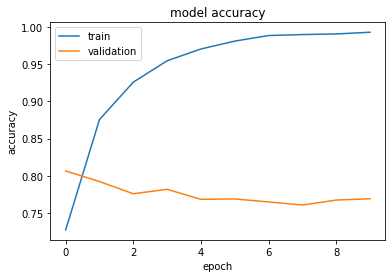

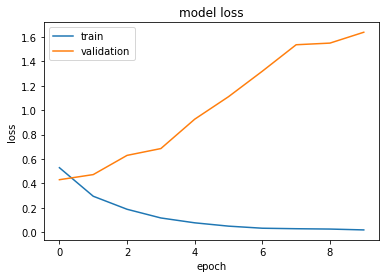

In [148]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [149]:
# evaluate the model
loss, accuracy = model.evaluate(X, y, verbose=2)
print('Training_Accuracy: %f' % (accuracy*100))

626/626 - 2s - loss: 0.3370 - accuracy: 0.9502
Training_Accuracy: 95.022964


#Predict on unseen data i.e. Test data. All the pre-processing is required to be done as was done for the previous model for the below to work. I ran the required codes from above before the below

In [0]:
y_hat = model.predict(X_test)
y_pred=np.round(y_hat)

In [152]:
print(classification_report(y_pred,y_test))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79      3921
         1.0       0.70      0.73      0.72      2756

    accuracy                           0.76      6677
   macro avg       0.75      0.76      0.76      6677
weighted avg       0.76      0.76      0.76      6677

0.7615695671708851


The accuracy achieved with Attention mechanism is lesser than that achieved with Bi-Direction LSTM. So we may want to use the Bi-Direction LSTM in production